In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [3]:
#Data augmentation

train_datagen=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

In [4]:
#Generators
batch_size=12
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CATS_DOGS/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CATS_DOGS/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 16220 images belonging to 2 classes.
Found 6182 images belonging to 2 classes.


In [5]:
#CNN model 32,64,128
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
results=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
1352/1352 [==============================] - 225s 166ms/step - loss: 0.3513 - accuracy: 0.8440 - val_loss: 0.3510 - val_accuracy: 0.8541
Epoch 2/10
1352/1352 [==============================] - 200s 148ms/step - loss: 0.3439 - accuracy: 0.8492 - val_loss: 0.3352 - val_accuracy: 0.8601
Epoch 3/10
1352/1352 [==============================] - 197s 146ms/step - loss: 0.3276 - accuracy: 0.8575 - val_loss: 0.4933 - val_accuracy: 0.8077
Epoch 4/10
1352/1352 [==============================] - 199s 148ms/step - loss: 0.3163 - accuracy: 0.8639 - val_loss: 0.3336 - val_accuracy: 0.8604
Epoch 5/10
1352/1352 [==============================] - 208s 154ms/step - loss: 0.3073 - accuracy: 0.8691 - val_loss: 0.4069 - val_accuracy: 0.8476
Epoch 6/10
1352/1352 [==============================] - 195s 144ms/step - loss: 0.3042 - accuracy: 0.8750 - val_loss: 0.2917 - val_accuracy: 0.8827
Epoch 7/10
1352/1352 [==============================] - 195s 144ms/step - loss: 0.2927 - accuracy: 0.8755 - val_

In [9]:
from keras.models import load_model

In [10]:
model.save('CatDog.h5')
model1=load_model('CatDog.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


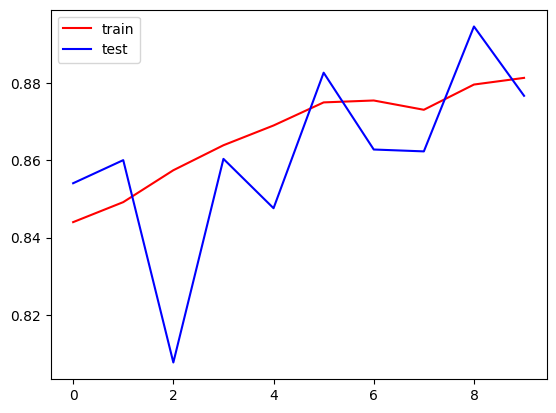

In [11]:
import matplotlib.pyplot as plt

plt.plot(results.history['accuracy'],color='red',label='train')
plt.plot(results.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

cat_img=image.load_img('/content/drive/MyDrive/cat.jpg',target_size=(150,150))
cat_img=image.img_to_array(cat_img)
cat_img=np.expand_dims(cat_img,axis=0)
cat_img=cat_img/255

In [18]:
prediction=model1.predict(cat_img)
classification=np.argmax(model1.predict(cat_img), axis=-1)

1/1 [==============================] - 0s 20ms/step


In [19]:
classification

array([0])